# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/투빅스/week7

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/투빅스/week7


In [2]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [3]:
spam = pd.read_csv('spam.csv')
data = spam.copy()

In [4]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [5]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# 결측치
spam.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
# 중복
spam['v2'].duplicated().sum()

403

In [9]:
# 중복 값 확인
spam[spam['v2'].duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
# 중복 제거
spam.drop_duplicates(subset=['v2'], inplace=True)
spam['v2'].duplicated().sum()

0

In [11]:
# 라벨 
spam['v1'].value_counts(normalize=True)

ham     0.87367
spam    0.12633
Name: v1, dtype: float64

In [12]:
spam['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

## Tokenizing


In [13]:
import nltk

In [14]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [15]:
# 전처리 전 데이터 확인
spam.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
# 정규 표현식 사용
import re

def preprocessing(data):
    text = re.sub('[^a-zA-Z]', ' ', data) # 알파벳(a-z, A-Z)만 추출
    text = text.lower() # 대문자 -> 소문자 변경
    return text

# 데이터 전처리
spam['v2'] = spam['v2'].apply(preprocessing)

In [17]:
# 전처리 후 데이터 확인
spam.head(10)

,v1,v2
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...
5,spam,freemsg hey there darling it s been week s n...
6,ham,even my brother is not like to speak with me ...
7,ham,as per your request melle melle oru minnamin...
8,spam,winner as a valued network customer you have...
9,spam,had your mobile months or more u r entitle...


In [18]:
# 불용어 리스트 불러오기
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_list = set(stopwords.words('english')) 
print('불용어 개수 :', len(stop_words_list))
print('불용어 확인 :\n',stop_words_list)

불용어 개수 : 179
불용어 확인 :
 {'ain', 'wouldn', 'they', 'in', "hadn't", 'which', 'while', 'above', 'them', 'does', 'below', "wouldn't", 'after', 'with', 'needn', 'down', 'to', 'into', 'hasn', 'theirs', 'don', 'his', 'was', "isn't", 'this', 'at', 'just', 'did', 'mustn', 've', 'nor', 'under', 'himself', "shan't", 'until', 'between', 'yours', 'again', 'both', "doesn't", 'have', "you've", 'ma', 'these', "it's", 'doing', "hasn't", "you'd", 'by', 'haven', 'ourselves', 'before', 'than', 'but', "should've", 'having', 'yourselves', 'hers', 'over', 'isn', "weren't", "won't", 'because', 'will', 'or', 'any', 'then', 'had', 'from', 'shan', 'on', 'all', "that'll", 'most', 'were', 'myself', "mustn't", 'so', 'weren', 'your', 'once', 'has', 'out', "mightn't", 'couldn', "needn't", 'our', 'each', 'been', 'her', "shouldn't", 'hadn', 'now', 'we', 'and', "she's", "you're", 'if', 'about', 'no', 'me', 'own', 'themselves', 'how', "don't", 'yourself', 'she', 'as', 'can', 'being', 'of', 'up', 'for', 'not', "haven't", '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# 토큰나이징 진행 + 불용어 제거
spam['v2'] = spam['v2'].map(lambda x : [word for word in word_tokenize(x) if not word in stop_words_list])

# 데이터 확인
spam.head(10)

,v1,v2
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
5,spam,"[freemsg, hey, darling, week, word, back, like..."
6,ham,"[even, brother, like, speak, treat, like, aids..."
7,ham,"[per, request, melle, melle, oru, minnaminungi..."
8,spam,"[winner, valued, network, customer, selected, ..."
9,spam,"[mobile, months, u, r, entitled, update, lates..."


In [20]:
# 데이터 분리 
# 스팸 O
spam_data = spam[spam['v1'] == 'spam']
# 스팸 X 
ham_data = spam[spam['v1'] != 'spam']

print(f'ham : {ham_data.shape}')
print(f'spam : {spam_data.shape}')

ham : (4516, 2)
spam : (653, 2)


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### 빈도수 기반의 단어 표현 (CountVectorizer)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# 정상 메일(ham)
vector = CountVectorizer(stop_words = 'english')
corpus_ham = sum(ham_data['v2'], []) # 코퍼스 생성
ham_vector = vector.fit_transform(corpus_ham)

In [22]:
len(corpus_ham)

35481

In [23]:
# 토큰 빈도수 확인 
count_ham = pd.DataFrame( {'word' : vector.get_feature_names(), 'count' : ham_vector.sum(axis = 0).flat})
# .flat : flatten method를 적용한 후의 1차 array에 indexing

# 정상 메일 Top 20 토큰 확인
count_ham.sort_values('count', ascending = False).head(20) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
2314,gt,288
3235,lt,287
3819,ok,255
2257,got,239
2968,know,225
3109,like,222
2240,good,215
1051,come,212
5895,ur,198
5651,time,192


In [24]:
# 'gt' 확인
data_h = data[data['v1'] != 'spam']
data_h[data_h['v2'].str.contains('gt')]

,v1,v2
44,ham,Great! I hope you like your man well endowed. ...
51,ham,"A gram usually runs like &lt;#&gt; , a half e..."
55,ham,Do you know what Mallika Sherawat did yesterda...
78,ham,Does not operate after &lt;#&gt; or what
177,ham,Turns out my friends are staying for the whole...
...,...,...
5498,ham,Why did I wake up on my own &gt;:(
5504,ham,Wait . I will msg after &lt;#&gt; min.
5513,ham,Yes. Please leave at &lt;#&gt; . So that at ...
5557,ham,No. I meant the calculation is the same. That ...


In [25]:
data_h.iloc[44]['v2']

'Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;'

빈도수가 가장 높게 나온 `gt`, `lt`는 HTML 특수문자인 `&lt`, `&gt`로 추정

In [26]:
# 스팸 메일(spam)
vector = CountVectorizer(stop_words = 'english')
corpus_spam = sum(spam_data['v2'], []) # 코퍼스 생성
spam_vector = vector.fit_transform(corpus_spam)

In [27]:
len(corpus_spam)

10078

In [28]:
# 토큰 빈도수 확인 
count_spam = pd.DataFrame( {'word' : vector.get_feature_names(), 'count' : spam_vector.sum(axis = 0).flat})

# 정상 메일 Top 20 토큰 확인
count_spam.sort_values('count', ascending = False).head(20) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
568,free,197
1684,txt,141
1722,ur,119
1513,stop,114
966,mobile,111
1596,text,109
1305,reply,96
267,claim,96
1850,www,83
1208,prize,82


스팸 메일의 경우 : `무료`, `휴대폰`, `문자 메세지`, `상품` 와 같은 단어들의 빈도수가 높음

정상 메일의 경우 : `일상적인 단어`들의 빈도수가 높음

### 워드투벡터(Word2Vec)
  * **CBOW(Continuous Bag of Words)** : 주변 단어를 통해 중심 단어를 예측
  * **Skip-gram** : 중심 단어에서 주변 단어를 예측

더 많은 정보를 바탕으로 특정 단어를 예측하기 때문에 CBoW의 성능이 더 좋을 것으로 생각하기 쉽지만,   
역전파 관점에서 보면 Skip-gram에서 훨씬 더 많은 학습이 일어나기 때문에 Skip-gram의 성능이 조금 더 좋게 나타남.  
다만, 계산량이 많기 때문에 Skip-gram에 드는 리소스가 더 큼.

#### skip-gram

In [29]:
from gensim.models import Word2Vec

# 스팸 메일  
model_spam = Word2Vec(spam_data['v2'] , size=100, window=2, min_count=2, iter=500, sg=1)
# word vector의 차원(embedding size): 300 , window 크기: 2, 최소 출현 수: 2, 500번 학습
# 파라미터 값 커질수록 학습량 많아짐
# sg=1: skip gram, sg=0: cbow

In [30]:
# 가장 빈도수가 높은 'free' 유사도 확인
model_spam.wv.most_similar('free')

[('minutes', 0.4562237858772278),
 ('deliveredtomorrow', 0.42405062913894653),
 ('sipix', 0.40412309765815735),
 ('press', 0.39869093894958496),
 ('unlimited', 0.39730486273765564),
 ('plus', 0.3851485550403595),
 ('babes', 0.3816869556903839),
 ('mobilesdirect', 0.3801302909851074),
 ('premium', 0.3716474175453186),
 ('str', 0.3705912232398987)]

In [31]:
# 빈도수 높은 단어 5개 리스트
top5_spam = list(count_spam.sort_values('count', ascending = False).head(5)['word'])

# top5 와 유사한 단어
model_spam.wv.most_similar(positive = top5_spam, topn=10)

[('chatting', 0.526612401008606),
 ('results', 0.5147878527641296),
 ('plus', 0.5144283175468445),
 ('sport', 0.5143473744392395),
 ('babes', 0.5018472075462341),
 ('deliveredtomorrow', 0.5018001198768616),
 ('brand', 0.5006641745567322),
 ('comp', 0.4964190423488617),
 ('rcv', 0.48758649826049805),
 ('hardcore', 0.4838791489601135)]

In [32]:
top5_spam

['free', 'txt', 'ur', 'stop', 'mobile']

In [33]:
# top5 중 가장 관계 없는 단어
print(model_spam.wv.doesnt_match(top5_spam))

txt


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [34]:
# 정상 메일  
model_ham = Word2Vec(ham_data['v2'] , size=100, window=2, min_count=2, iter=500, sg=1)

In [35]:
# 가장 빈도수가 높은 'ok' 유사도 확인 -> 의미없는 특수문자 'gt', 'lt' 제외
model_ham.wv.most_similar('ok')

[('broad', 0.42145979404449463),
 ('nothing', 0.3902035355567932),
 ('favorite', 0.3731909692287445),
 ('hols', 0.3638363182544708),
 ('speed', 0.3631836175918579),
 ('longer', 0.35936054587364197),
 ('forgiven', 0.35848402976989746),
 ('lor', 0.3577071726322174),
 ('happend', 0.3550533950328827),
 ('din', 0.3506167232990265)]

In [36]:
# 빈도수 높은 단어 5개 리스트
top5_ham = list(count_ham.sort_values('count', ascending = False).head(5)['word'])

# top5 와 유사한 단어
model_ham.wv.most_similar(positive = top5_ham, topn=10)

[('kicks', 0.5602061748504639),
 ('dollars', 0.5491936206817627),
 ('clearly', 0.5014475584030151),
 ('wifi', 0.49940091371536255),
 ('vivek', 0.49574267864227295),
 ('transfered', 0.49082449078559875),
 ('credited', 0.48857054114341736),
 ('spoiled', 0.476041704416275),
 ('excuses', 0.4697848856449127),
 ('decimal', 0.4667460024356842)]

In [37]:
top5_ham

['gt', 'lt', 'ok', 'got', 'know']

In [38]:
# top5 중 가장 관계 없는 단어
print(model_ham.wv.doesnt_match(top5_ham))

ok


#### cbow

In [39]:
# 스팸 메일  
model_spam2 = Word2Vec(spam_data['v2'] , size=100, window=2, min_count=2, iter=500, sg=0)

In [40]:
# 가장 빈도수가 높은 'free' 유사도 확인
model_spam2.wv.most_similar('free')

[('st', 0.3382953703403473),
 ('minutes', 0.32575899362564087),
 ('reply', 0.32437819242477417),
 ('unlimited', 0.321410596370697),
 ('plus', 0.3211309313774109),
 ('extra', 0.314138263463974),
 ('ok', 0.30678707361221313),
 ('text', 0.30233803391456604),
 ('porn', 0.2961481809616089),
 ('arcade', 0.29301345348358154)]

In [41]:
# top5 와 유사한 단어
model_spam2.wv.most_similar(positive = top5_spam, topn=10)

[('p', 0.44983723759651184),
 ('reply', 0.39948922395706177),
 ('wk', 0.38695430755615234),
 ('plus', 0.3855128288269043),
 ('sport', 0.375948041677475),
 ('per', 0.3725920021533966),
 ('tones', 0.3659026622772217),
 ('st', 0.3542172908782959),
 ('ok', 0.3490492105484009),
 ('starting', 0.33571213483810425)]

In [42]:
# top5 중 가장 관계 없는 단어
print(model_spam2.wv.doesnt_match(top5_spam))

stop


In [43]:
# 정상 메일  
model_ham2 = Word2Vec(ham_data['v2'] , size=100, window=2, min_count=2, iter=500, sg=0)

In [44]:
# 가장 빈도수가 높은 'ok' 유사도 확인
model_ham2.wv.most_similar('ok')

[('u', 0.4817288815975189),
 ('home', 0.4283487796783447),
 ('get', 0.4071813225746155),
 ('anything', 0.35718974471092224),
 ('call', 0.35328158736228943),
 ('go', 0.32305818796157837),
 ('back', 0.3155837059020996),
 ('time', 0.3143044710159302),
 ('still', 0.31358420848846436),
 ('lor', 0.3126327097415924)]

In [45]:
# top5 와 유사한 단어
model_ham2.wv.most_similar(positive = top5_ham, topn=10)

[('get', 0.47595781087875366),
 ('k', 0.46839290857315063),
 ('time', 0.4471632242202759),
 ('need', 0.4243486523628235),
 ('call', 0.42214059829711914),
 ('give', 0.4026532769203186),
 ('dollars', 0.3829091787338257),
 ('u', 0.3817712366580963),
 ('dont', 0.36591488122940063),
 ('please', 0.35401415824890137)]

In [46]:
# top5 중 가장 관계 없는 단어
print(model_ham.wv.doesnt_match(top5_ham))

ok


### 패스트텍스트(FastText)

In [47]:
from gensim.models import FastText

# 스팸 메일
fasttext_spam = FastText(spam_data['v2'] , size=100, window=2, min_count=2)

In [48]:
fasttext_spam.wv.most_similar("free")

[('freephone', 0.9987524151802063),
 ('ringtone', 0.9986386299133301),
 ('collection', 0.9986303448677063),
 ('selection', 0.9985918998718262),
 ('calling', 0.9985744953155518),
 ('customer', 0.9985671043395996),
 ('receiving', 0.9985615015029907),
 ('ringtones', 0.9985600113868713),
 ('reply', 0.9985590577125549),
 ('awaiting', 0.9985120892524719)]

In [49]:
# 정상 메일
fasttext_ham = FastText(ham_data['v2'] , size=100, window=2, min_count=2)

In [50]:
fasttext_ham.wv.most_similar("ok")

[('caught', 0.9999008178710938),
 ('tok', 0.9998998641967773),
 ('sight', 0.9998981356620789),
 ('great', 0.9998968243598938),
 ('goodnight', 0.999896228313446),
 ('showing', 0.9998961091041565),
 ('laughing', 0.9998958110809326),
 ('lesson', 0.9998943209648132),
 ('devouring', 0.9998941421508789),
 ('king', 0.9998937845230103)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color='black', max_words=50, width = 400, height = 300)

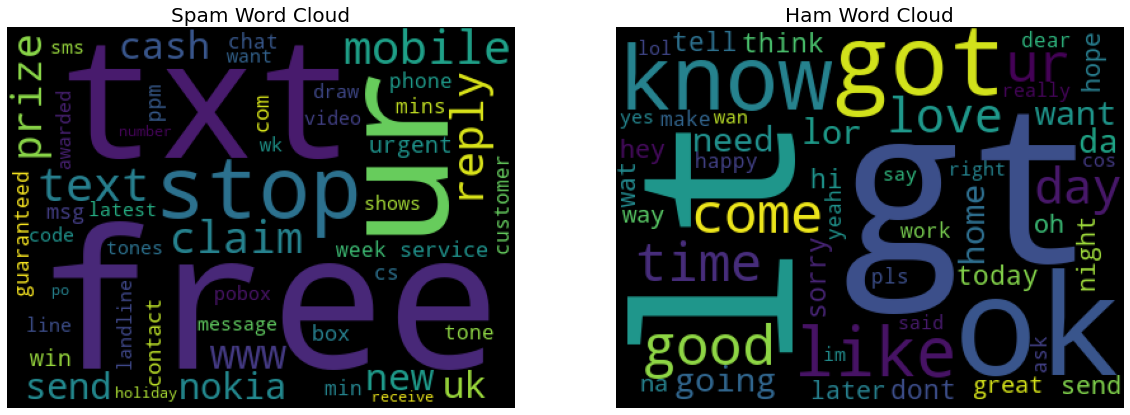

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Spam Word Cloud', size=20)
count_dic = dict(zip(count_spam['word'], count_spam['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,2,2)
plt.title('Ham Word Cloud', size=20)
count_dic = dict(zip(count_ham['word'], count_ham['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

스팸 메일 특징
* `무료(free)`라는 단어 사용 빈도가 높음
* 최신 휴대폰 광고가 많은 것으로 추정 (휴대폰과 관련된 단어의 비율이 높음)